# Risk Metrics

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

Using S&P 500 as demonstration

In [2]:
ticker = yf.Ticker("^GSPC")
data = ticker.history(period="1y")

## Daily Return
Day-to-day gain/loss

In [3]:
returns = data['Close'].pct_change().dropna()

In [4]:
returns.head()

Date
2024-09-20 00:00:00-04:00   -0.001941
2024-09-23 00:00:00-04:00    0.002809
2024-09-24 00:00:00-04:00    0.002511
2024-09-25 00:00:00-04:00   -0.001861
2024-09-26 00:00:00-04:00    0.004039
Name: Close, dtype: float64

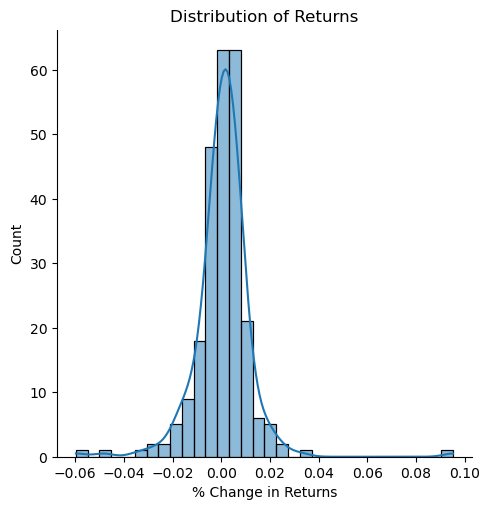

In [5]:
sns.displot(
    data=returns,
    kde=True
);
plt.title("Distribution of Returns")
plt.xlabel("% Change in Returns")
plt.show()

## Cumulative Return
Overall growth

In [6]:
cumulative_return = (1 + returns).cumprod() - 1

In [7]:
cumulative_return.head()

Date
2024-09-20 00:00:00-04:00   -0.001941
2024-09-23 00:00:00-04:00    0.000863
2024-09-24 00:00:00-04:00    0.003376
2024-09-25 00:00:00-04:00    0.001509
2024-09-26 00:00:00-04:00    0.005553
Name: Close, dtype: float64

## Volatility / Std Dev of Returns
Uncertainty of the distribution (distance from mean)

In [8]:
volatility = returns.std()

In [9]:
print(f"Volatility: {volatility:.3f}")

Volatility: 0.012


## Rolling Volatility / Rolling Std Dev
Dynamic volatility - uncertainty over time

In [10]:
# Using 30 day window
volatility_30d = returns.rolling(window=30).std()

In [11]:
volatility_30d.tail()

Date
2025-09-12 00:00:00-04:00    0.006799
2025-09-15 00:00:00-04:00    0.005987
2025-09-16 00:00:00-04:00    0.005504
2025-09-17 00:00:00-04:00    0.005396
2025-09-18 00:00:00-04:00    0.005323
Name: Close, dtype: float64

## Sharpe Ratio
Return per unit of volatility

In [12]:
mean_return = returns.mean()
std_return = returns.std()
sharpe_ratio = mean_return / std_return

In [13]:
print(f"Mean Return: {mean_return:.3f}\nVolatility of Return: {std_return:.3f}\nSharpe Ratio: {sharpe_ratio:.3f}") # Higher sharpe = more reward for risk

Mean Return: 0.001
Volatility of Return: 0.012
Sharpe Ratio: 0.057


## Parametric Value-at-Risk
Worst expected daily loss at a given confidence interval (normal distribution assumption)

In [14]:
# Worst-case scenario means left one-tailed test -> alpha at 5th percentile
z_95 = -1.645

p_var = mean_return - (z_95 * std_return)

In [15]:
print(f"95% Confidence Parametric VaR: {p_var}")
print(f"We don't expect to lose more than {(p_var * 100):.2f}% on 95% of days in the period.")

95% Confidence Parametric VaR: 0.020103151019392466
We don't expect to lose more than 2.01% on 95% of days in the period.


## Non-Parametric VaR
Worst expected daily loss at a given confidence interval (any distribution)

In [16]:
np_var_95 = returns.quantile(0.05) # 5% are below the value returned

In [17]:
print(f"95% Confidence Non-Parametric VaR: {np_var_95}")
print(f"We don't expect to lose more than {(np_var_95 * -100):.2f}% on 95% of days in the period.")

95% Confidence Non-Parametric VaR: -0.01607793165266793
We don't expect to lose more than 1.61% on 95% of days in the period.


## Max Drawdown
Worst crash from a peak

In [18]:
cumulative = (1 + returns).cumprod()
rolling_max = cumulative.cummax()
drawdown = (cumulative - rolling_max) / rolling_max
max_drawdown = drawdown.min()

In [19]:
print(f"Max Drawdown: {max_drawdown}")
print(f"The worst crash this period resulted in a loss of {(max_drawdown * -100):.2f}%")

Max Drawdown: -0.1890220618428398
The worst crash this period resulted in a loss of 18.90%
